# Model Training

#### Imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
import joblib

#### Load clean Dataset

In [23]:
df = pd.read_csv("../datasets/processed/final_clean_dataset.csv")

In [24]:
print(f"Shape : {df.shape}")

Shape : (56730, 12)


In [25]:
display(df.head())

,TrainNumber,Date,Distance_x,Weather,FestivalImpact,TimeOfDay,DelayMinutes,StationName,StationCode,ArrivalTime,DepartureTime,Distance_y
0,12002,2024-01-01,690,Fog,1.0,Evening,70,NEW DELHI,NDLS,06:00:00,06:00:00,0
1,12002,2024-01-01,690,Fog,1.0,Evening,70,MATHURA JN.,MTJ,07:23:00,07:24:00,137
2,12002,2024-01-01,690,Fog,1.0,Evening,70,AGRA CANTT,AGC,07:57:00,08:02:00,191
3,12002,2024-01-01,690,Fog,1.0,Evening,70,DHAULPUR,DHO,08:41:00,08:42:00,243
4,12002,2024-01-01,690,Fog,1.0,Evening,70,MORENA,MRA,09:01:00,09:02:00,259


#### Encode categorical variables

In [26]:
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded, columns=["FestivalImpact", "Weather", "TimeOfDay"], drop_first=True)

In [27]:
print(f"Encoded data Shape: {df_encoded.shape}")

Encoded data Shape: (56730, 17)


In [28]:
df_encoded.head()

,TrainNumber,Date,Distance_x,DelayMinutes,StationName,StationCode,ArrivalTime,DepartureTime,Distance_y,FestivalImpact_0.5,FestivalImpact_1.0,Weather_Fog,Weather_Rain,Weather_Storm,TimeOfDay_Evening,TimeOfDay_Morning,TimeOfDay_Night
0,12002,2024-01-01,690,70,NEW DELHI,NDLS,06:00:00,06:00:00,0,False,True,True,False,False,True,False,False
1,12002,2024-01-01,690,70,MATHURA JN.,MTJ,07:23:00,07:24:00,137,False,True,True,False,False,True,False,False
2,12002,2024-01-01,690,70,AGRA CANTT,AGC,07:57:00,08:02:00,191,False,True,True,False,False,True,False,False
3,12002,2024-01-01,690,70,DHAULPUR,DHO,08:41:00,08:42:00,243,False,True,True,False,False,True,False,False
4,12002,2024-01-01,690,70,MORENA,MRA,09:01:00,09:02:00,259,False,True,True,False,False,True,False,False


#### Feature Selection and Split

In [29]:
# ========== Feature Selection ==========
X = df_encoded.drop(columns=["DelayMinutes", "Date", "StationName", "StationCode", "ArrivalTime", "DepartureTime"])
y = df_encoded["DelayMinutes"]

# ========== Train- test Split ==========
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print(f"Train set Shape: {X_train.shape}")

Train set Shape: (45384, 11)


In [31]:
print(f"Test set Shape: {X_test.shape}")

Test set Shape: (11346, 11)


#### Model Training

In [32]:
# ========== Train Random Forest Regressor ==========
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("✅Model Training Complete")

✅Model Training Complete


#### Model Evaluation

In [33]:
# ---------- Predictions ----------
y_pred = rf.predict(X_test)

# ---------- Evaluation ----------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 11.40
RMSE: 14.47
R2: 0.79


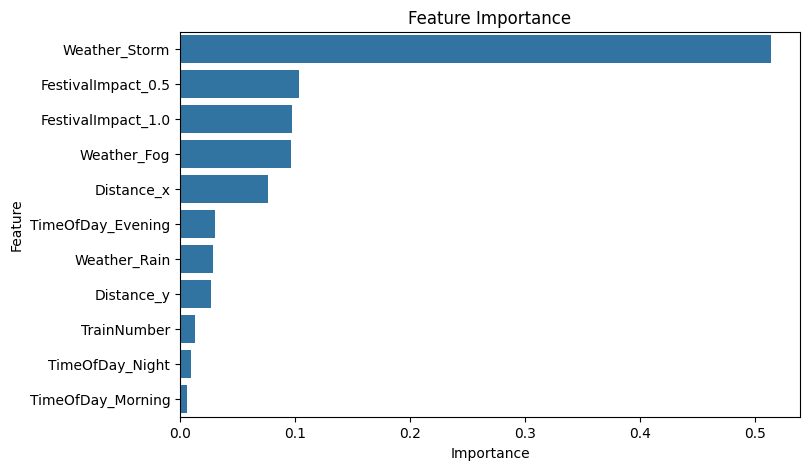

In [34]:
# ---------- Feature Importance ----------
importances = rf.feature_importances_
feature_names = X_train.columns
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance")
plt.show()

#### Save Model

In [35]:
joblib.dump(rf, "../models/delay_predictor.pkl")
print("✅Model saved to ../models/delay_predictor.pkl")

✅Model saved to ../models/delay_predictor.pkl
